In [1]:
import sys, time
import pandas as pd
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
import plotly.plotly as py # interactive graphing

from IPython.display import display
from plotly.graph_objs import Bar, Scatter, Marker, Layout

In [4]:
pd.options.display.max_rows = 100

In [5]:
df_jogos_olimpicos = pd.read_excel('jogos_olimpicos.xlsx')

In [6]:
df_jogos_olimpicos

,id_parlamentar,Parlamentar,Sigla,Partido Partido,Voto
0,0,ABELARDO CAMARINHA,40.0,PSB,Obstrucao
1,1,ADILSON ROSSI,40.0,PSB,Obstrucao
2,2,AFONSO LOBATO,43.0,PV,Sim
3,3,ALDO DEMARCHI,25.0,DEM,Sim
4,4,ALENCAR SANTANA,13.0,PT,Sim
5,5,ANA DO CARMO,13.0,PT,Sim
6,6,ANALICE FERNANDES,45.0,PSDB,---
7,7,ANDRE DO PRADO,22.0,PR,Obstrucao
8,8,ANDRE SOARES,25.0,DEM,---
9,9,ANGELO PERUGINI,12.0,PDT,---


In [7]:
df = df_jogos_olimpicos

# Data preparation

### Votação Jogos Olímpicos

##### Ementa: Dispõe sobre medidas relativas aos Jogos Olímpicos e Paralímpicos de 2016 e dá providências correlatas.

##### Indexadores	BEBIDA ALCOÓLICA, ESTADO DE SÃO PAULO, JOGOS OLÍMPICOS, JOGOS PARAOLÍMPICOS, MEDIDAS, MEIA ENTRADA, PROVIDÊNCIAS, PUBLICIDADE, REALIZAÇÃO, REGULAMENTAÇÃO

In [8]:
column_edge = 'Voto'
column_ID = 'id_parlamentar'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [9]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [10]:
G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.id_parlamentar.tolist())

In [11]:
G.nodes()

NodeView((0, 1, 7, 11, 14, 18, 19, 20, 25, 30, 33, 39, 42, 45, 50, 51, 53, 54, 56, 61, 62, 63, 64, 68, 70, 71, 73, 75, 78, 79, 80, 81, 85, 89, 92, 2, 3, 4, 5, 10, 12, 13, 16, 17, 22, 23, 26, 28, 29, 31, 32, 34, 35, 36, 37, 41, 44, 46, 48, 49, 52, 55, 58, 59, 60, 65, 66, 67, 72, 74, 84, 90, 91, 93, 6, 8, 9, 15, 27, 38, 40, 47, 57, 69, 76, 77, 82, 83, 86, 87, 88, 21, 43, 24))

### Partidos


In [13]:
column_edge = 'Sigla'
column_ID = 'id_parlamentar'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]

d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [14]:
# Create the connections in the graph
links_attributes = {tuple(row[[column_ID, column_ID+"_2"]]): {column_edge: row[column_edge]} for i,row in d.iterrows()}

G.add_edges_from(links_attributes) # create the connection, without attribute. Check it with G.get_edge_data(3,5)
nx.set_edge_attributes(G=G, values=links_attributes) # adds the attribute. Check it with G.get_edge_data(3,5)

# Graph analysis

### Drawing graphs

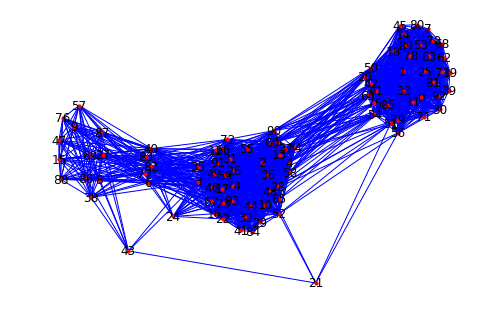

In [15]:
nx.draw(G, node_size=10, edge_color='b', edge_width=1, with_labels=True, node_label_position ='top center')


In [16]:
nx.write_gml(G, 'pl_jogos_olimpicos.gml')